# Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Spotify API Configuration with Spotipy

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred

In [12]:
scope = 'user-read-recently-played',
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cred.client_ID, client_secret=cred.client_SECRET, redirect_uri=cred.redirect_url, scope=scope))
sp.current_user_playlists()

OSError: [Errno 48] Address already in use

In [4]:
def analyze_playlist(creator, playlist_id):
    scope = 'user-read-recently-played',
    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cred.client_ID, client_secret=cred.client_SECRET, redirect_uri=cred.redirect_url, scope=scope))
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

### First-time Run

### Existing CSV Run

In [ ]:
vibes_to_reset = pd.read_csv('data/vibes_to_reset.csv')
vibes_to_reset.head()

artist                  album                track_name  \
0       Mac Ayres             Drive Slow                      Easy   
1   Daniel Caesar               Freudian  Best Part (feat. H.E.R.)   
2     Bruno Major  A Song For Every Moon                    Easily   
3           keshi              skeletons                 skeletons   
4  Kendrick Lamar                  DAMN.       LOVE. FEAT. ZACARI.   

                 track_id  danceability  energy  key  loudness  mode  \
0  58dSdjfEYNSxte1aNVxuNf         0.722   0.282    5    -7.484     1   
1  1RMJOxR6GRPsBHL8qeC2ux         0.524   0.364    7   -10.209     1   
2  2k9N4caeCIJLOWwWwssrEM         0.772   0.256    7    -8.545     0   
3  2BuJrxYKhYky20dQqTlobO         0.719   0.265    2   -12.782     1   
4  6PGoSes0D9eUDeeAafB2As         0.800   0.585   10    -7.343     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.1060           0.00557     0.147    0.217   91.367       314358   
1       0.0367           0.00000     0.100    0.436   75.240       209831   
2       0.0481           0.00612     0.144    0.357  118.902       210240   
3       0.0754           0.08650     0.108    0.273   80.021       152480   
4       0.0924           0.00000     0.153    0.779  126.058       213400   

   time_signature  
0               4  
1               4  
2               3  
3               4  
4               4

## Playlists Classified as 'Happy'

### First-time Run

### Existing CSV Run

In [ ]:
mood_booster = pd.read_csv('data/happy/mood_booster.csv')
great_day = pd.read_csv('data/happy/great_day.csv')
good_vibes = pd.read_csv('data/happy/good_vibes.csv')
happy_beats = pd.read_csv('data/happy/happy_beats.csv')
feeling_good = pd.read_csv('data/happy/feeling_good.csv')

In [ ]:
happy = pd.concat([mood_booster,great_day,good_vibes,happy_beats,feeling_good],ignore_index=True)
happy.head()

artist                                       album  \
0             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
1        Post Malone                      Twelve Carat Toothache   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
1  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.717   0.671    0    -5.077     0       0.0337          0.000003   
1         0.733   0.670    5    -6.009     1       0.0751          0.000000   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.0921   0.6990  110.054       160657               4  
1    0.1210   0.4720  100.964       192841               4  
2    0.2240   0.7320  138.992       163648               4  
3    0.1840   0.7520  119.996       182895               5  
4    0.1570   0.0976   96.985       202396               4

In [ ]:
happy.duplicated().value_counts()

False    397
True      29
dtype: int64

In [ ]:
happy.drop_duplicates(inplace=True)
happy.duplicated().value_counts()

False    397
dtype: int64

In [ ]:
happy['mood'] = 1

In [ ]:
happy.head()

artist                                       album  \
0             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
1        Post Malone                      Twelve Carat Toothache   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
1  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.717   0.671    0    -5.077     0       0.0337          0.000003   
1         0.733   0.670    5    -6.009     1       0.0751          0.000000   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  mood  
0    0.0921   0.6990  110.054       160657               4     1  
1    0.1210   0.4720  100.964       192841               4     1  
2    0.2240   0.7320  138.992       163648               4     1  
3    0.1840   0.7520  119.996       182895               5     1  
4    0.1570   0.0976   96.985       202396               4     1

## Playlists Classified as 'Sad'

### First-time Run

### Existing CSV Run

In [ ]:
sad_songs = pd.read_csv('data/sad/sad_songs.csv')
life_sucks = pd.read_csv('data/sad/life_sucks.csv')
idk = pd.read_csv('data/sad/idk.csv')
sad_bops = pd.read_csv('data/sad/sad_bops.csv')
sad_covers = pd.read_csv('data/sad/sad_covers.csv')

In [ ]:
sad = pd.concat([sad_songs,life_sucks,idk,sad_bops,sad_covers],ignore_index=True)
sad.head()

artist                 album             track_name  \
0   Benson Boone          In The Stars           In The Stars   
1     Becky Hill   Remember (Acoustic)    Remember - Acoustic   
2          Birdy                 Birdy            Skinny Love   
3     Dean Lewis  How Do I Say Goodbye   How Do I Say Goodbye   
4  Gracie Abrams                 minor  I miss you, I’m sorry   

                 track_id  danceability  energy  key  loudness  mode  \
0  1ei3hzQmrgealgRKFxIcWn         0.362   0.540   10    -6.031     1   
1  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
2  4RL77hMWUq35NYnPLXBpih         0.379   0.290    4    -8.485     1   
3  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   
4  4nyF5lmSziBAt7ESAUjpbx         0.445   0.455    7    -6.405     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.0528          0.000000    0.1390    0.300   78.007       216410   
1       0.0412          0.000000    0.1950    0.509  118.899       178627   
2       0.0510          0.001060    0.1180    0.169  166.467       201080   
3       0.0674          0.000000    0.0656    0.393   81.552       163603   
4       0.0575          0.000001    0.1240    0.151  109.885       167538   

   time_signature  
0               3  
1               4  
2               4  
3               4  
4               5

In [ ]:
sad.duplicated().value_counts()

False    443
True      12
dtype: int64

In [ ]:
sad.drop_duplicates(inplace=True)
sad.duplicated().value_counts()

False    443
dtype: int64

In [ ]:
sad['mood'] = 2

In [ ]:
sad.head()

artist                 album             track_name  \
0   Benson Boone          In The Stars           In The Stars   
1     Becky Hill   Remember (Acoustic)    Remember - Acoustic   
2          Birdy                 Birdy            Skinny Love   
3     Dean Lewis  How Do I Say Goodbye   How Do I Say Goodbye   
4  Gracie Abrams                 minor  I miss you, I’m sorry   

                 track_id  danceability  energy  key  loudness  mode  \
0  1ei3hzQmrgealgRKFxIcWn         0.362   0.540   10    -6.031     1   
1  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
2  4RL77hMWUq35NYnPLXBpih         0.379   0.290    4    -8.485     1   
3  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   
4  4nyF5lmSziBAt7ESAUjpbx         0.445   0.455    7    -6.405     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.0528          0.000000    0.1390    0.300   78.007       216410   
1       0.0412          0.000000    0.1950    0.509  118.899       178627   
2       0.0510          0.001060    0.1180    0.169  166.467       201080   
3       0.0674          0.000000    0.0656    0.393   81.552       163603   
4       0.0575          0.000001    0.1240    0.151  109.885       167538   

   time_signature  mood  
0               3     2  
1               4     2  
2               4     2  
3               4     2  
4               5     2

## Combining the DataFrame

In [ ]:
df = pd.concat([happy,sad],ignore_index=True)
df.head()

artist                                       album  \
0             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
1        Post Malone                      Twelve Carat Toothache   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
1  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.717   0.671    0    -5.077     0       0.0337          0.000003   
1         0.733   0.670    5    -6.009     1       0.0751          0.000000   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  mood  
0    0.0921   0.6990  110.054       160657               4     1  
1    0.1210   0.4720  100.964       192841               4     1  
2    0.2240   0.7320  138.992       163648               4     1  
3    0.1840   0.7520  119.996       182895               5     1  
4    0.1570   0.0976   96.985       202396               4     1

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            840 non-null    object 
 1   album             840 non-null    object 
 2   track_name        840 non-null    object 
 3   track_id          840 non-null    object 
 4   danceability      840 non-null    float64
 5   energy            840 non-null    float64
 6   key               840 non-null    int64  
 7   loudness          840 non-null    float64
 8   mode              840 non-null    int64  
 9   speechiness       840 non-null    float64
 10  instrumentalness  840 non-null    float64
 11  liveness          840 non-null    float64
 12  valence           840 non-null    float64
 13  tempo             840 non-null    float64
 14  duration_ms       840 non-null    int64  
 15  time_signature    840 non-null    int64  
 16  mood              840 non-null    int64  
dt

In [ ]:
df.describe()

danceability      energy         key    loudness        mode  \
count    840.000000  840.000000  840.000000  840.000000  840.000000   
mean       0.610100    0.538575    5.219048   -8.259571    0.690476   
std        0.136489    0.237740    3.609301    3.443812    0.462573   
min        0.182000    0.027400    0.000000  -24.819000    0.000000   
25%        0.516000    0.341000    2.000000  -10.447750    0.000000   
50%        0.624000    0.550500    5.000000   -7.746500    1.000000   
75%        0.707250    0.740000    8.000000   -5.725500    1.000000   
max        0.954000    0.975000   11.000000   -1.248000    1.000000   

       speechiness  instrumentalness    liveness     valence       tempo  \
count   840.000000        840.000000  840.000000  840.000000  840.000000   
mean      0.061792          0.037024    0.164952    0.478916  118.199924   
std       0.053980          0.131948    0.121038    0.247445   25.385460   
min       0.023300          0.000000    0.026500    0.037600   49.534000   
25%       0.034400          0.000000    0.096900    0.274000  100.987250   
50%       0.043450          0.000007    0.116000    0.464500  119.650000   
75%       0.063725          0.001010    0.183000    0.680000  130.068000   
max       0.611000          0.962000    0.924000    0.979000  200.268000   

         duration_ms  time_signature        mood  
count     840.000000      840.000000  840.000000  
mean   203466.252381        3.910714    1.527381  
std     50267.569619        0.372319    0.499547  
min     84177.000000        1.000000    1.000000  
25%    171954.500000        4.000000    1.000000  
50%    196044.000000        4.000000    2.000000  
75%    227329.750000        4.000000    2.000000  
max    613027.000000        5.000000    2.000000

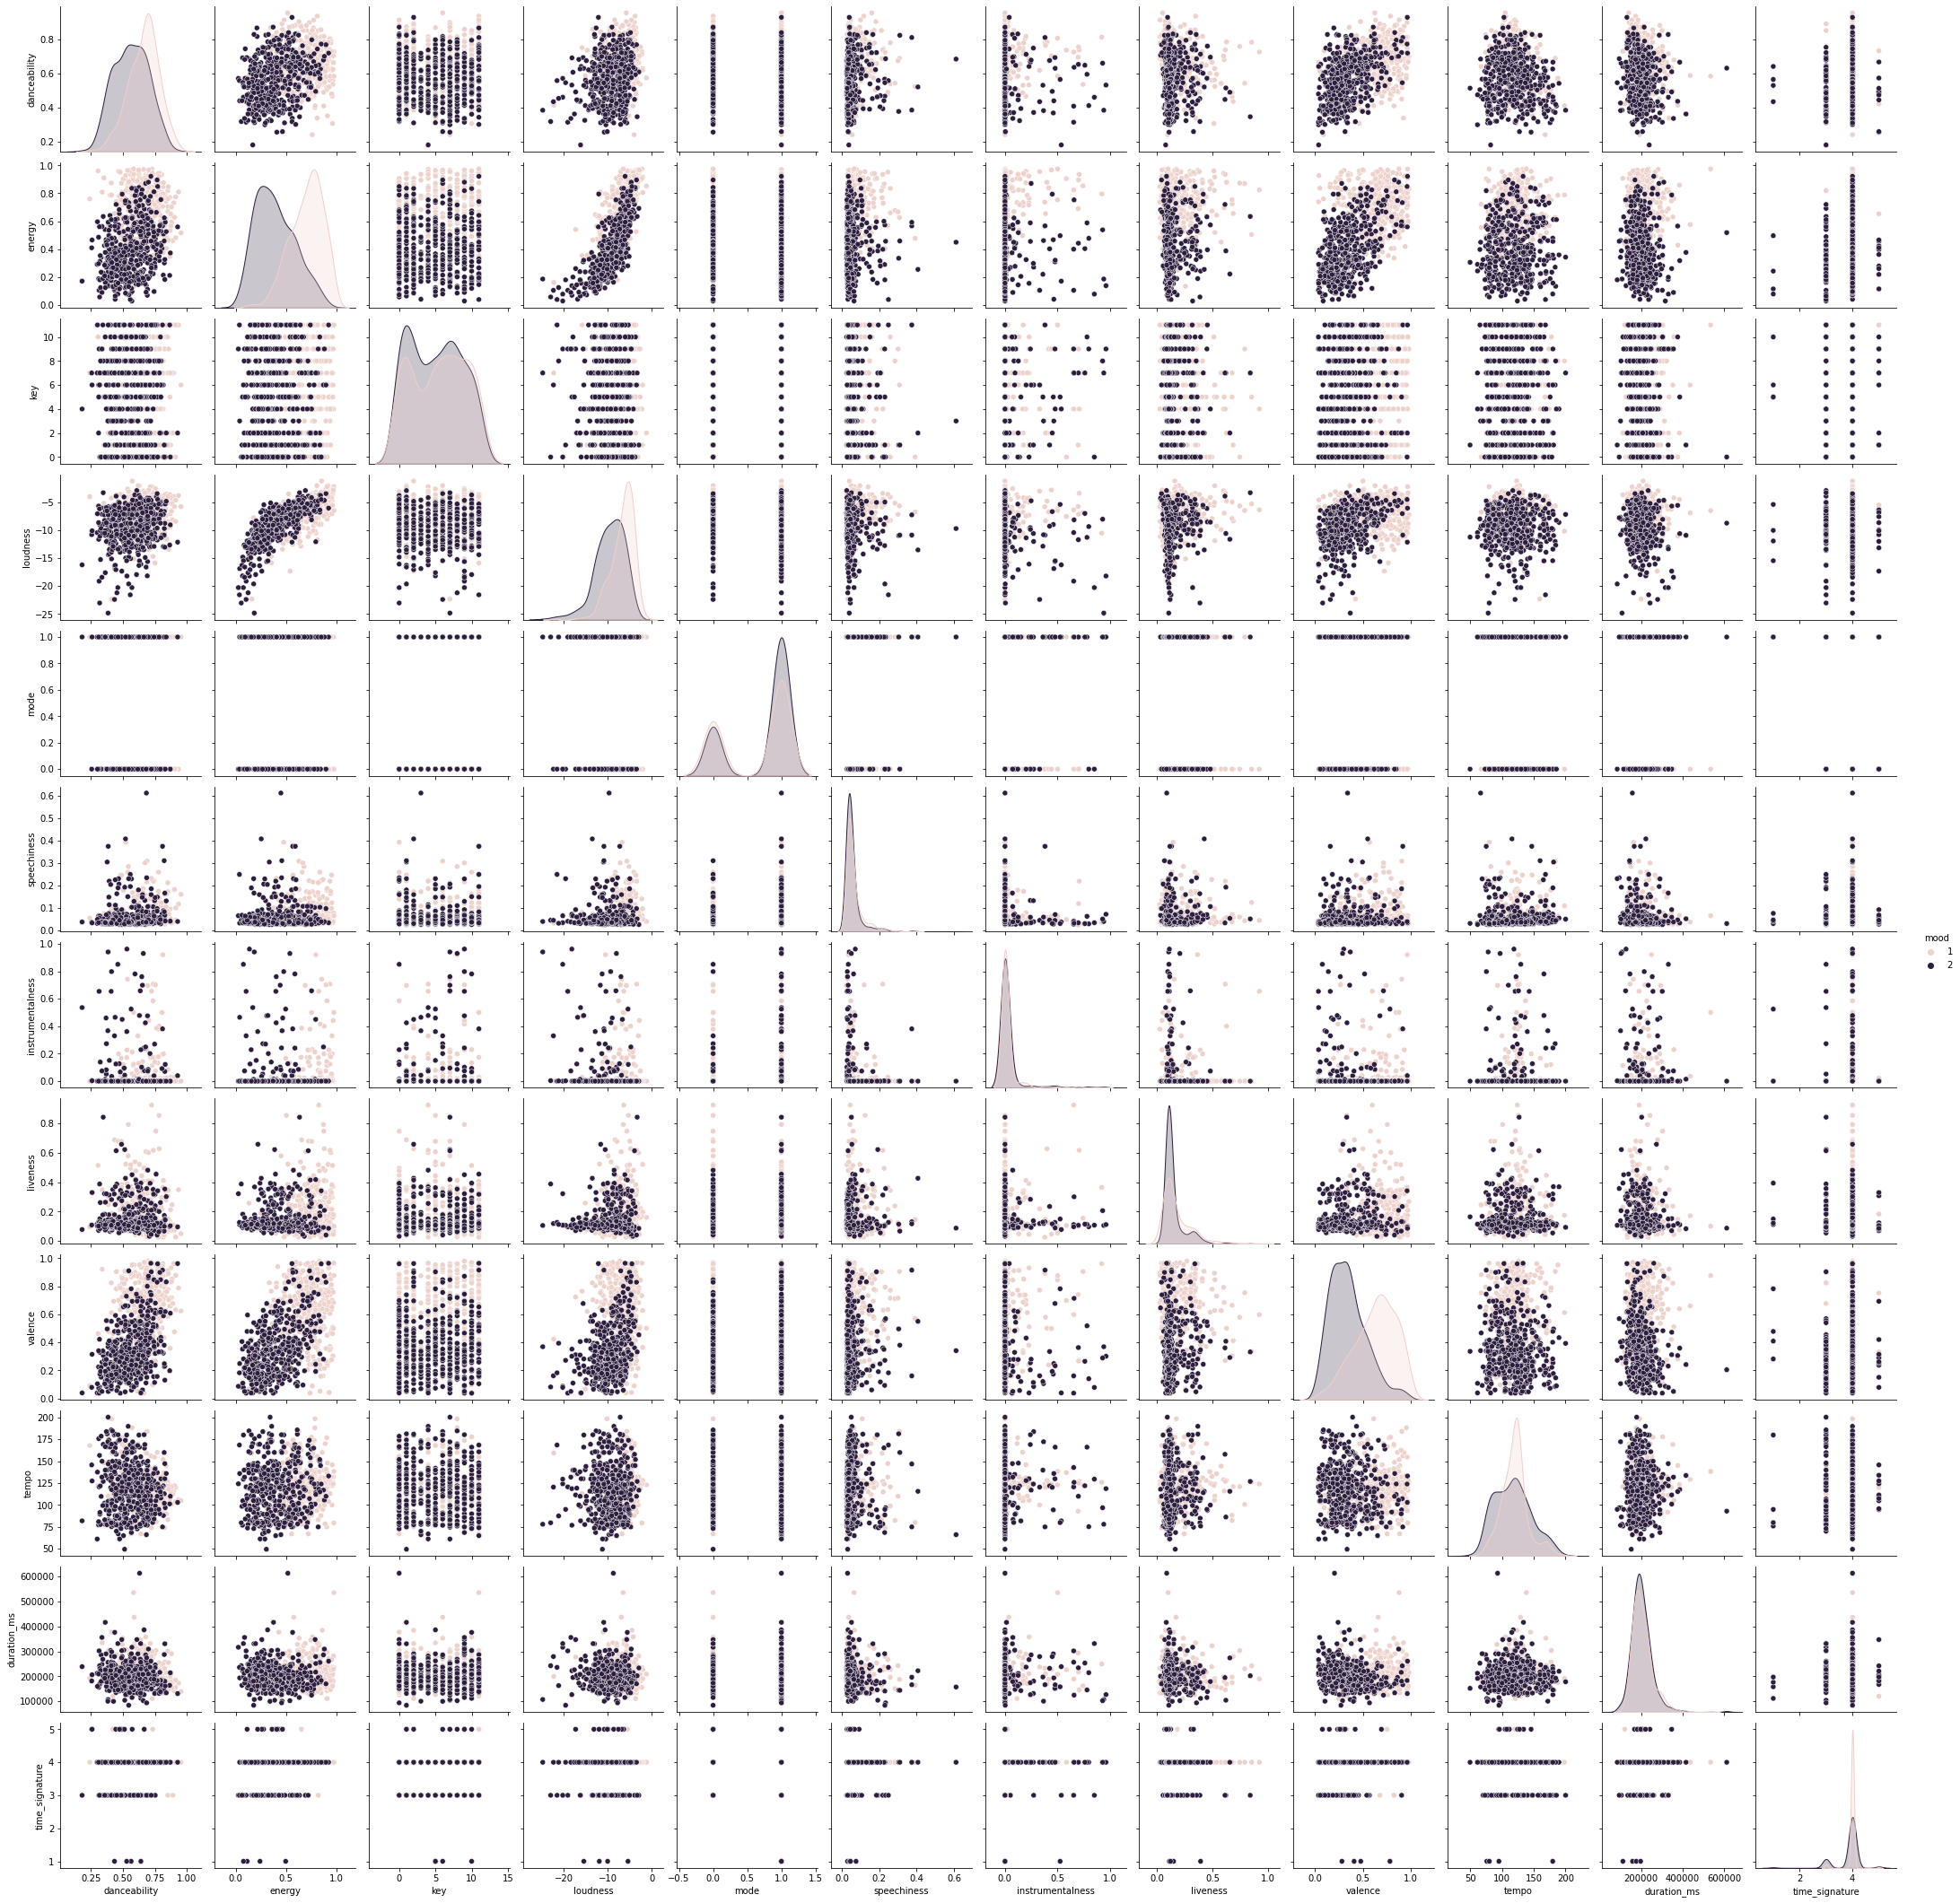

In [ ]:
sns.pairplot(df,hue='mood')

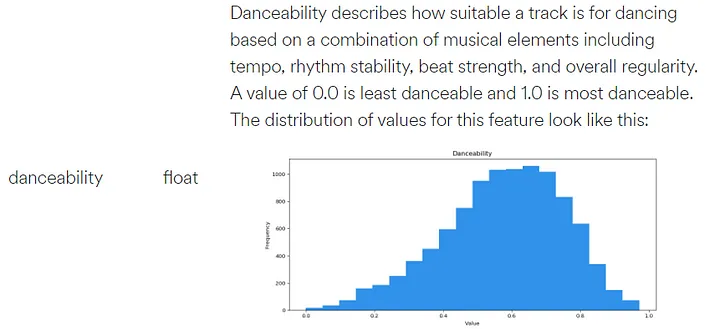

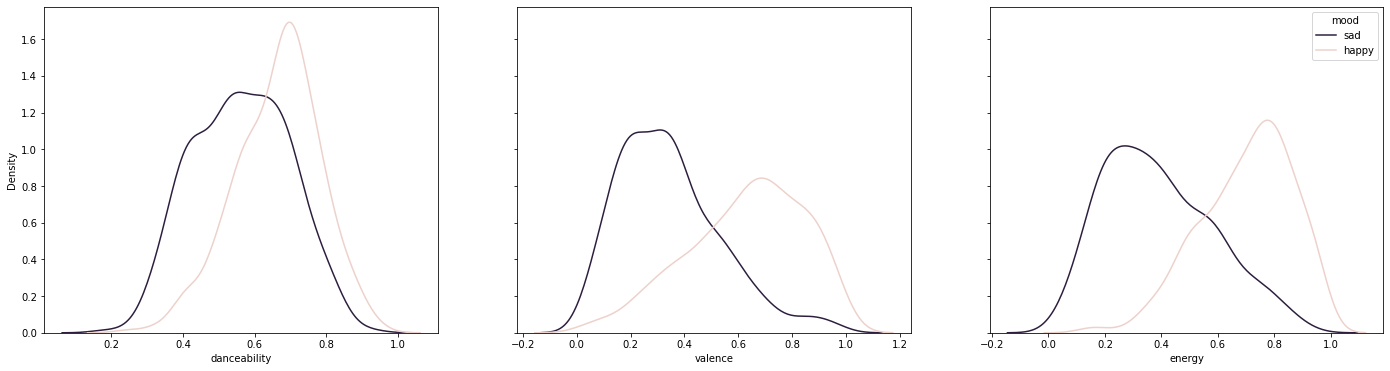

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(24,6),sharey=True)
sns.kdeplot(data=df,x='danceability',hue='mood',ax=axes[0])
sns.kdeplot(data=df,x='valence',hue='mood',ax=axes[1])
sns.kdeplot(data=df,x='energy',hue='mood',ax=axes[2])

for ax in axes:
    ax.legend([],[], frameon=False)
ax.legend(title='mood',labels=['sad','happy'])
plt.show()

# Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.drop(['artist','album','track_name','track_id'],axis=1,inplace=True)

In [ ]:
X = df.drop(['mood'],axis=1)
y = df['mood']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.73      0.75      0.74       118
           2       0.78      0.75      0.77       134

    accuracy                           0.75       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.75      0.75      0.75       252



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 89  29]
 [ 33 101]]


## Tree Visualization

In [ ]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[:-1])
features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

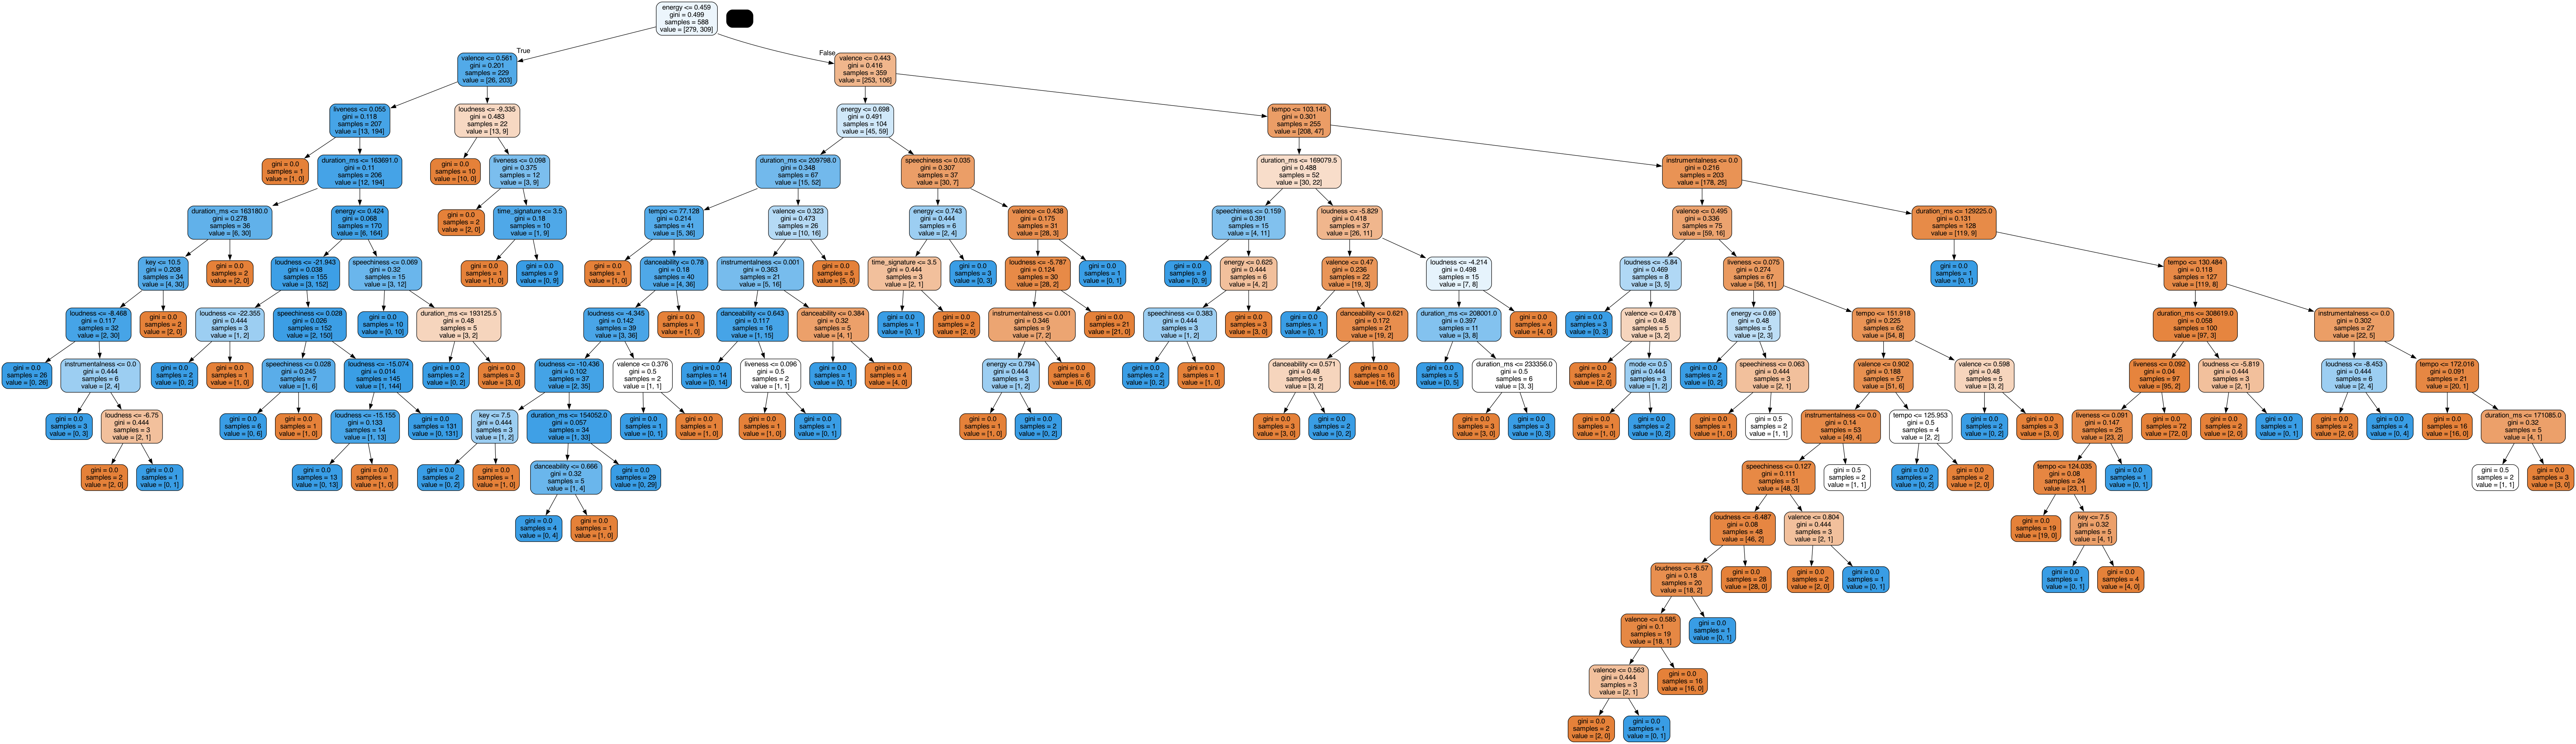

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluations

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[100  18]
 [ 19 115]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.84      0.85      0.84       118
           2       0.86      0.86      0.86       134

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252



# Model Evaluation / Tuning

## Feature Selection

In [ ]:
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:1} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: energy Importance: 0.24
Variable: valence Importance: 0.23
Variable: loudness Importance: 0.11
Variable: danceability Importance: 0.09
Variable: tempo Importance: 0.07
Variable: speechiness Importance: 0.06
Variable: liveness Importance: 0.06
Variable: duration_ms Importance: 0.06
Variable: instrumentalness Importance: 0.05
Variable: key Importance: 0.03
Variable: mode Importance: 0.01
Variable: time_signature Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Cumulative Importances')

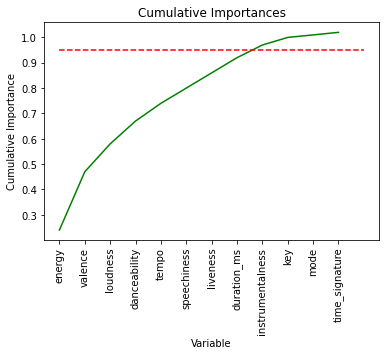

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

In [ ]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 9


In [ ]:
# df.drop(['key','mode','time_signature'],axis=1,inplace=True)

Since each metric has a relatively significant importance on the classification of the mood (as shown on the graph), I've decided to keep all features as dropping them lead to no significant improvement in performance.

## Hyperparameter Tuning Through K-Fold CV

In [ ]:
from pprint import pprint
# RandomForestClassifier().get_params().keys()
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
# Instantiate the grid search model
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [ ]:
# Fit the grid search to the data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.805 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.839 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.856 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.803 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.839 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.847 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sq

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 25}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_grid = grid.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.1389 degrees.
Accuracy = 90.08%.
Model Performance
Average Error: 0.1508 degrees.
Accuracy = 89.48%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.66%.


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[103  15]
 [ 23 111]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.82      0.87      0.84       118
           2       0.88      0.83      0.85       134

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252



# Model Save

In [ ]:
import pickle
pickle.dump(grid,open('model.pkl','wb'))

# Sample Prediction

In [6]:
def classify_playlist(creator, playlist_id):
    playlist = analyze_playlist(creator, playlist_id)
    playlist_predictions = grid.predict(playlist.drop(['artist','album','track_name','track_id'],axis=1))
    playlist['prediction'] = playlist_predictions
    playlist['prediction'] = playlist['prediction'].replace(1, 'Happy')
    playlist['prediction'] = playlist['prediction'].replace(2, 'Sad')
    return playlist

In [7]:
def classify_rating(playlist):
    # values = playlist['prediction'].value_counts().keys().tolist()
    counts = playlist['prediction'].value_counts().tolist()
    happiness_rating = counts[1] / counts[0]
    return happiness_rating

In [8]:
sample = classify_playlist('Matthew Lim', '30cdY3LXb1nZBdTY05wEXj') # vibes_to_reset playlist

OSError: [Errno 48] Address already in use

In [ ]:
print('Happiness Rating:', "{0:.0%}".format(classify_rating(sample)))